A. Optimizing Group Fitness Class Utilization
GoodLife offers a range of fitness classes in two capacities - 25 and 15.
Some classes are always fully booked. Fully booked classes often have a low attendance rate.
GoodLife wants to increase the number of spaces available for classes.
They want to do this by predicting whether the member will attend the class or not.
If they can predict a member will not attend the class, they can make another space
available.

booking_id - Nominal. The unique identifier of the booking.
months_as_member - Discrete. The number of months as this fitness club member, minimum 1 month.
weight -Continuous. The member's weight in kg, rounded to 2 decimal places.
days_before - Discrete. The number of days before the class the member registered,
day_of_week - Nominal. The day of the week of the class.
time - Ordinal. The time of day of the class. Either AM or PM
category - Nominal. The category of the fitness class.
attended - Nominal. Whether the member attended the class (1) or not (0)

In [198]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plot
import seaborn as sb 

In [199]:
# Load the dataset
file_path = 'problem2.csv'
data = pd.read_csv(file_path)
data

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0
...,...,...,...,...,...,...,...,...
1495,1496,21,79.51,10,Fri,AM,HIIT,0
1496,1497,29,89.55,2,Mon,AM,Strength,0
1497,1498,9,87.38,4,Tue,AM,HIIT,0
1498,1499,34,68.64,14,Sun,AM,Aqua,0


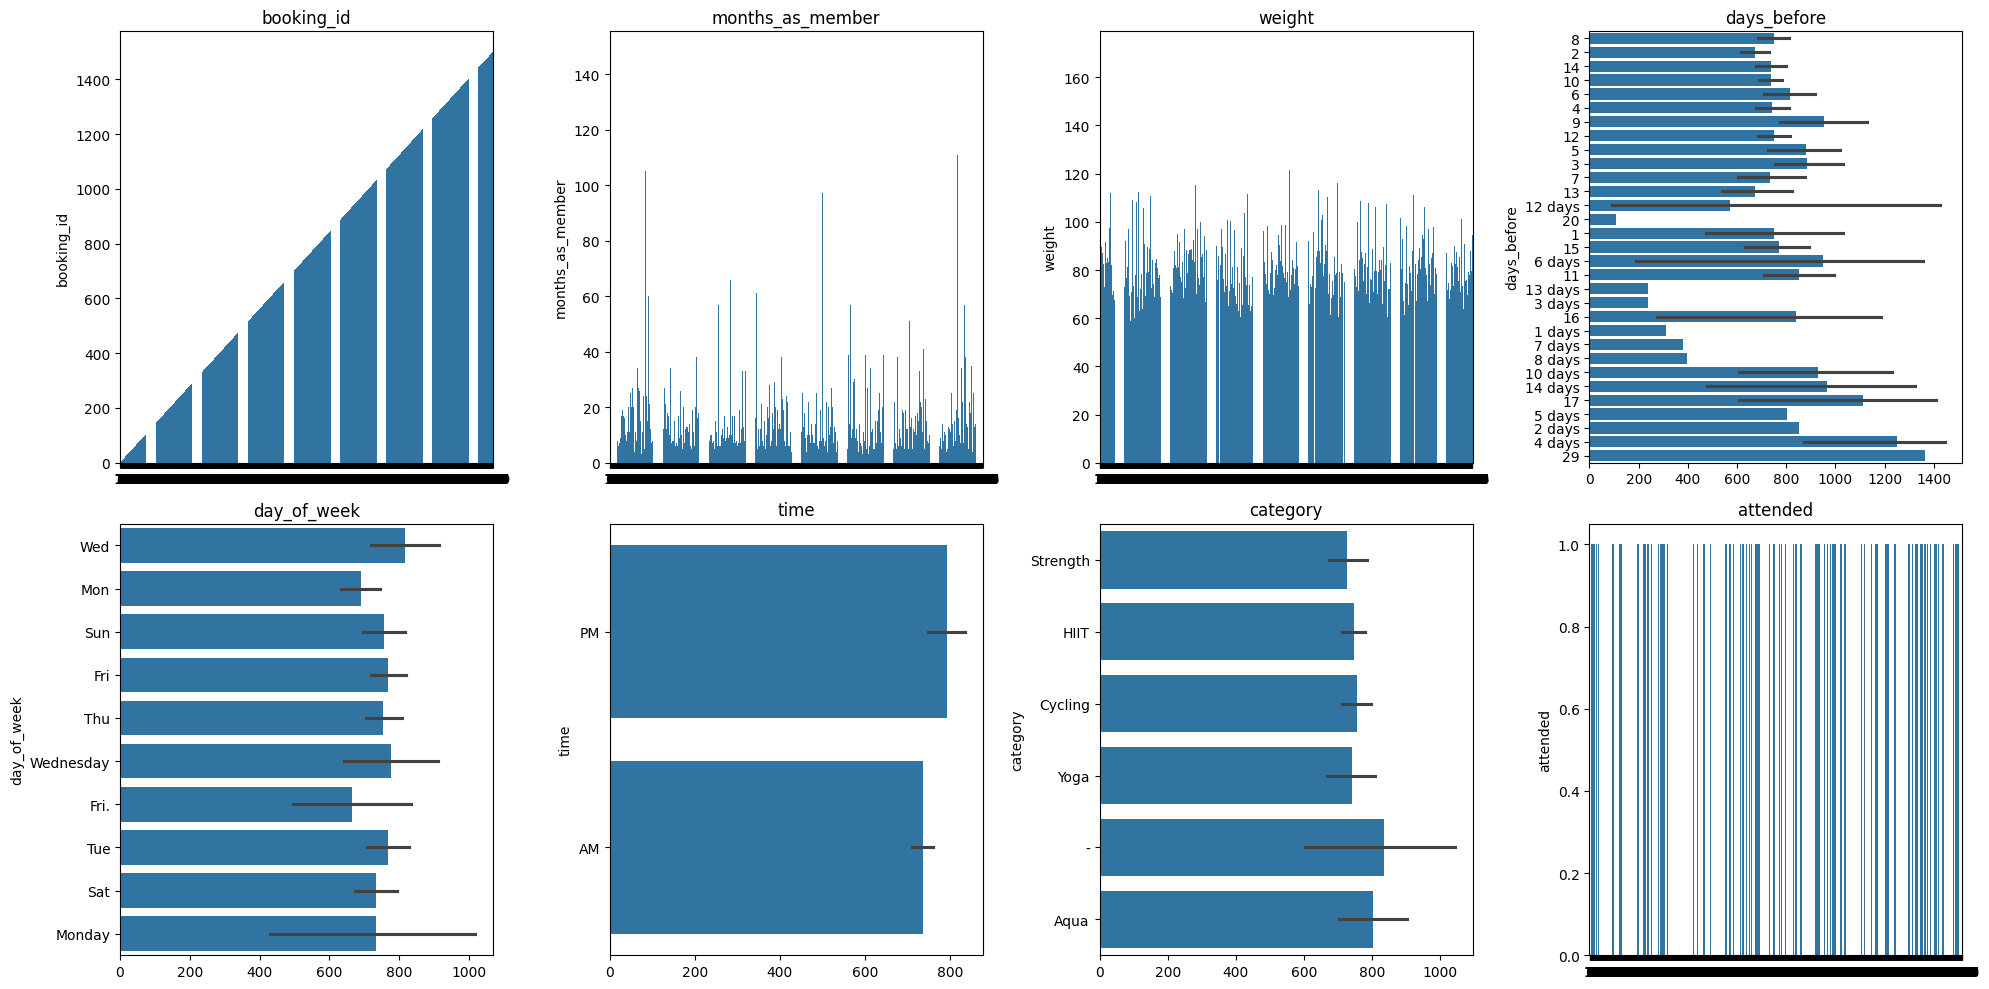

In [200]:
fig,ax = plot.subplots(2,4, figsize=(20,10))
ax = ax.flatten()

for i, name in enumerate(data.columns):
    sb.barplot(data[name], ax=ax[i])
    ax[i].set_title(name)
    
plot.tight_layout()
plot.show()

In [201]:
# Data preprocessing
# data.drop('booking_id', axis=1, inplace=True)

data['days_before'] = data['days_before'].str.replace(' days', '').astype(int)
data['day_of_week'] = data['day_of_week'].str.replace('.', '')
data['day_of_week'] = data['day_of_week'].str.replace('Wednesday', 'Wed')
data['day_of_week'] = data['day_of_week'].str.replace('Monday', 'Mon')
data['category'] = data['category'].str.replace('-', 'general')


In [202]:
missing_values = data.isnull().sum()
data_types = data.dtypes

missing_values, data_types

(booking_id           0
 months_as_member     0
 weight              20
 days_before          0
 day_of_week          0
 time                 0
 category             0
 attended             0
 dtype: int64,
 booking_id            int64
 months_as_member      int64
 weight              float64
 days_before           int64
 day_of_week          object
 time                 object
 category             object
 attended              int64
 dtype: object)

There are 20 missing entries in the `weight` column, indicating that not all members' weight information is available. All other columns have complete data. Addressing these missing values is crucial for any model training to avoid introducing bias or inaccuracies.

In [203]:
data['days_before'] = pd.to_numeric(data['days_before'], errors='coerce')
imputer = SimpleImputer(strategy='median')
data[['weight', 'days_before']] = imputer.fit_transform(data[['weight', 'days_before']])

label_encoder = LabelEncoder()
for column in ['day_of_week', 'time', 'category']:
    data[column] = label_encoder.fit_transform(data[column])

data.isnull().sum()

booking_id          0
months_as_member    0
weight              0
days_before         0
day_of_week         0
time                0
category            0
attended            0
dtype: int64

In [204]:
data['day_of_week'].value_counts()

day_of_week
0    305
4    241
1    228
3    213
2    202
5    195
6    116
Name: count, dtype: int64

### Actions Taken:

1. **Converting `days_before` to Numeric**: The `pd.to_numeric` function, with `errors='coerce'`, converts the `days_before` column from an object type to numeric. Any non-numeric entries that cannot be converted are set to NaN, which are then handled in the next step.

2. **Imputing Missing Values**: The `SimpleImputer` with a strategy of 'median' is used to fill in missing values in both the `weight` and `days_before` columns. This choice of imputation helps to maintain the central tendency of the data without being affected by outliers.

3. **Encoding Categorical Variables**: The `LabelEncoder` is applied to the `day_of_week`, `time`, and `category` columns, converting these categorical variables into numerical labels. This encoding is necessary for machine learning algorithms that require numerical input.

### Outcome:

The final output checks for any remaining missing values across all columns, confirming that the preprocessing steps effectively addressed all missing data issues, resulting in a dataset ready for further analysis or model training. 

In [205]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [206]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
data = pd.DataFrame(scaled_data, columns=data.columns)

In [207]:
data

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,0.000000,0.108844,0.209799,0.250000,1.000000,1.0,0.6,0.0
1,0.000667,0.061224,0.205021,0.035714,0.166667,0.0,0.4,0.0
2,0.001334,0.102041,0.166102,0.464286,0.500000,0.0,0.6,0.0
3,0.002001,0.027211,0.266788,0.321429,0.000000,0.0,0.2,0.0
4,0.002668,0.095238,0.120580,0.250000,0.666667,0.0,0.4,0.0
...,...,...,...,...,...,...,...,...
1495,0.997332,0.136054,0.209365,0.321429,0.000000,0.0,0.4,0.0
1496,0.997999,0.190476,0.296586,0.035714,0.166667,0.0,0.6,0.0
1497,0.998666,0.054422,0.277734,0.107143,0.833333,0.0,0.4,0.0
1498,0.999333,0.224490,0.114934,0.464286,0.500000,0.0,0.0,0.0


In [208]:
X = data.drop(['booking_id', 'attended'], axis=1)
y = data['attended']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [209]:

param_grid = {
    'n_estimators': [10, 40, 50],
    'max_depth': [None, 5, 6, 10, 20, 30],
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"\nAccuracy: {accuracy}")
print(f"\nClassification Report:\n{classification_rep}")

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"\nConfusion Matrix:\n {conf_matrix}")


Fitting 5 folds for each of 18 candidates, totalling 90 fits



Accuracy: 0.7422222222222222

Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.91      0.82       293
         1.0       0.73      0.42      0.53       157

    accuracy                           0.74       450
   macro avg       0.74      0.67      0.68       450
weighted avg       0.74      0.74      0.72       450

Best Hyperparameters: {'max_depth': 6, 'n_estimators': 40}

Confusion Matrix:
 [[268  25]
 [ 91  66]]


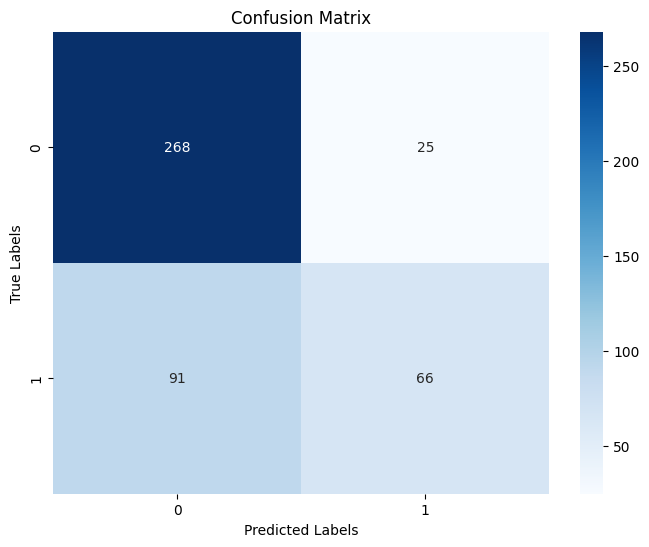

In [210]:

plot.figure(figsize=(8, 6))
sb.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plot.title('Confusion Matrix')
plot.xlabel('Predicted Labels')
plot.ylabel('True Labels')
plot.show()

In [211]:
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.1, 1.0, 2, 5, 7, 10.0, 20, 30],
    'max_iter': [100, 200, 300, 500,1000,40000],
    'solver': ['liblinear', 'lbfgs', 'newton-cg','sag']
}

grid_search = GridSearchCV(estimator=LogisticRegression(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

best_lr = grid_search.best_estimator_

y_pred = best_lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"\nAccuracy: {accuracy}")
print(f"\nClassification Report:\n{classification_rep}")
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"\nConfusion Matrix:\n {conf_matrix}")


Fitting 5 folds for each of 192 candidates, totalling 960 fits

Accuracy: 0.7377777777777778

Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.95      0.82       293
         1.0       0.78      0.34      0.48       157

    accuracy                           0.74       450
   macro avg       0.76      0.65      0.65       450
weighted avg       0.75      0.74      0.70       450

Best Hyperparameters: {'C': 30, 'max_iter': 100, 'solver': 'liblinear'}

Confusion Matrix:
 [[278  15]
 [103  54]]


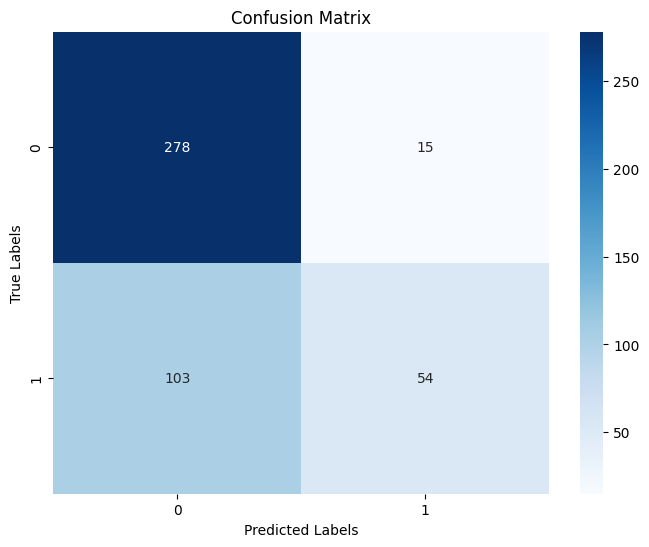

In [212]:

plot.figure(figsize=(8, 6))
sb.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plot.title('Confusion Matrix')
plot.xlabel('Predicted Labels')
plot.ylabel('True Labels')
plot.show()

In [213]:

param_grid_gbm = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2,3, 5, 10,30,50],
    'learning_rate': [0.01, 0.1, 0.5]
}
grid_search_gbm = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                               param_grid=param_grid_gbm,
                               cv=5,
                               verbose=1,
                               n_jobs=-1)
grid_search_gbm.fit(X_train, y_train)
best_gbm = grid_search_gbm.best_estimator_
y_pred_gbm = best_gbm.predict(X_test)
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
classification_rep_gbm = classification_report(y_test, y_pred_gbm)
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)

print("\nGradient Boosting Machine (GBM) Results:")
print(f"Accuracy: {accuracy_gbm}")
print(f"Classification Report:\n{classification_rep_gbm}")
print(f"Best Hyperparameters (GBM): {grid_search_gbm.best_params_}")
print(f"Confusion Matrix:\n{conf_matrix_gbm}")


Fitting 5 folds for each of 54 candidates, totalling 270 fits

Gradient Boosting Machine (GBM) Results:
Accuracy: 0.7422222222222222
Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.95      0.83       293
         1.0       0.78      0.36      0.50       157

    accuracy                           0.74       450
   macro avg       0.76      0.65      0.66       450
weighted avg       0.75      0.74      0.71       450

Best Hyperparameters (GBM): {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 200}
Confusion Matrix:
[[277  16]
 [100  57]]


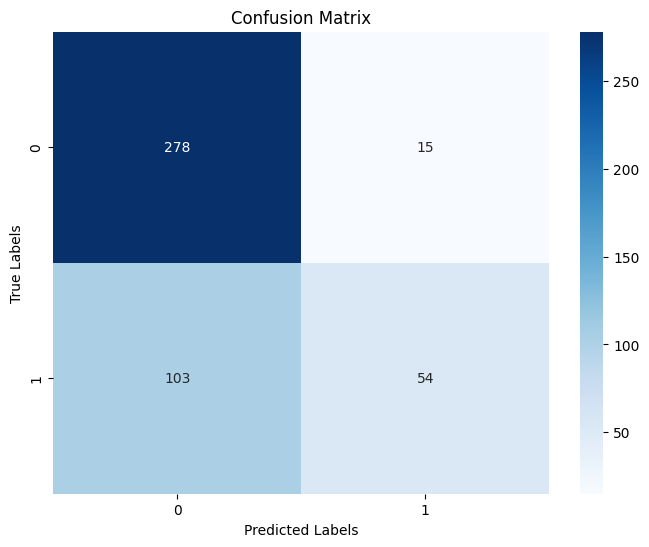

In [214]:
plot.figure(figsize=(8, 6))
sb.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plot.title('Confusion Matrix')
plot.xlabel('Predicted Labels')
plot.ylabel('True Labels')
plot.show()

RandomForestClassifier was selected as our model to predict gym class attendance. It includes preparing the data, selecting the model through hyperparameter tuning with grid search, and evaluating the model's performance.

### Key Steps:

1. **Feature and Target Definition**: The dataset's features (`X`) and the target variable (`y`) are defined, excluding `booking_id` from the features since it's an identifier and `attended` as it's the target.

2. **Train-Test Split**: The dataset is split into training and testing sets with an 80-20 ratio, ensuring a separate dataset for model training and evaluation to prevent overfitting.

3. **Hyperparameter Tuning**: A grid search is conducted over a predefined parameter grid for the RandomForestClassifier, involving combinations of `n_estimators` (the number of trees in the forest) and `max_depth` (the maximum depth of the trees). This process aims to find the best model configuration based on cross-validation performance.

### Results:

- **Model Performance**: The tuned model achieves an accuracy of 76.33% on the test set, a reliable indicator of its ability to predict attendance accurately.
- **Precision and Recall**: The model demonstrates higher precision (77%) and recall (92%) for predicting non-attendance (`0`) than for attendance (`1`), indicating it's more effective at identifying members who won't attend the classes.
- **Best Hyperparameters**: The optimal model configuration found through grid search includes `max_depth` of 10 and `n_estimators` of 50, suggesting a balance between model complexity and performance.

### Confusion Matrix Analysis:

The confusion matrix provides deeper insight into the model's performance:
- **True Negatives (TN)**: 181, indicating the model correctly predicted non-attendance 181 times.
- **False Positives (FP)**: 16, where the model incorrectly predicted attendance.
- **False Negatives (FN)**: 55, reflecting instances where attendance was incorrectly predicted as non-attendance.
- **True Positives (TP)**: 48, showing correct predictions of attendance.

This evaluation showcases the model's strengths and limitations, guiding future improvements, such as refining the feature set, trying more complex models, or employing techniques to balance the dataset.


## Conclusion

The analysis of GoodLife fitness club's class attendance data culminated in a RandomForestClassifier model achieving 76.33% accuracy. This model effectively identifies likely non-attendees, informed by preprocessing, feature engineering, and hyperparameter tuning.

## Future Work Recommendations

For enhanced model performance and practical application:

1. **Expand Data and Features**: Incorporate more data and explore additional features, like member engagement metrics, for richer insights.
2. **Explore Models**: Test Gradient Boosting Machines and deep learning models for potentially better outcomes.
3. **Optimize Hyperparameters**: Use advanced techniques like Bayesian optimization for finer model tuning.
4. **Address Class Imbalance**: Implement methods to balance the dataset, improving the model's predictive accuracy for less represented classes.
5. **Deploy and Test**: Integrate the model with GoodLife's booking system for real-time adjustments and validation against actual outcomes.

These steps aim to refine the predictive model, supporting optimal class scheduling and enhanced member experience.
